# Importing libraries

In [54]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import itertools
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,LSTM,SpatialDropout1D
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional
from keras.callbacks import ModelCheckpoint

# Loading Data


In [56]:
data=np.load('preprocessed6class.npz')
trainx,trainy,testx,testy,validx,validy=data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3'],data['arr_4'],data['arr_5']

print(trainx.shape)
print(trainy.shape)

print(testx.shape)
print(testy.shape)

print(validx.shape)
print(validy.shape)

(10240,)
(10240,)
(1267,)
(1267,)
(1284,)
(1284,)


# Converting to labels one hot array 

In [3]:
lb_train= LabelBinarizer()
y_train=lb_train.fit_transform(trainy)
y_test=lb_train.transform(testy)
y_val=lb_train.transform(validy)

In [4]:
print(y_train)
print(y_test)
print(y_val)

[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]]
[[1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]]
[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 ...
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]


# Preprocessing for various classifiers and then using tfidf techninques

In [57]:
def get_string(l):
    s=""
    for i in l:
        s+=i;
        s+=" "
    return s

In [58]:
def get_dataframe(data):
    for i in range(len(data)):
        data[i]=get_string(data[i])
    return data
    
    

In [59]:
x_train=get_dataframe(trainx)
x_test=get_dataframe(testx)
x_valid=get_dataframe(validx)

In [60]:
print(x_train)

['say anni list polit group support thirdtrimest abort demand '
 'declin coal start start natur ga took start begin presid georg w bush administr '
 'hillari clinton agre john mccain vote give georg bush benefit doubt iran '
 ...
 'say altern social secur oper galveston counti texa ha meant particip retir whole lot money social secur '
 'lift us cuban embargo allow travel cuba '
 'depart veteran affair ha manual tell veteran stuff like realli valu commun know encourag commit suicid ']


# Function for plotting the confusion matrix

In [61]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [62]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
tfidf_valid=tfidf_vectorizer.transform(x_valid)

# Multinomial Naive Bayes 

Test accuracy:   0.219
Valid accuracy:   0.234
Confusion matrix, without normalization


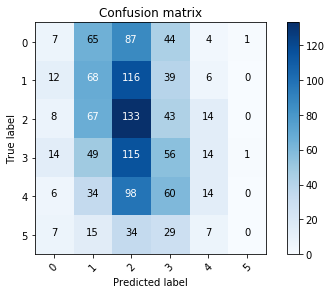

In [65]:
clf = MultinomialNB()
clf.fit(tfidf_train, trainy)
pred = clf.predict(tfidf_test)
pred2=clf.predict(tfidf_valid)
score = metrics.accuracy_score(testy, pred)
score2=metrics.accuracy_score(validy,pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, pred, labels=[0, 1,2,3,4,5])
plot_confusion_matrix(cm, classes=[0, 1,2,3,4,5])

#  Logistic Regression Classifier

C:\Users\Gourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gourav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Test accuracy :   0.235
Valid accuracy :   0.241
Confusion matrix, without normalization


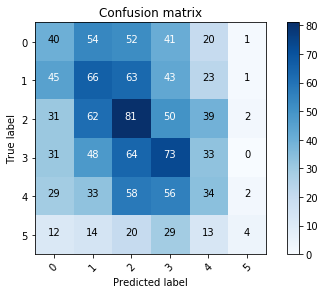

In [66]:
reg=LogisticRegression()
reg.fit(tfidf_train, trainy)
pred = reg.predict(tfidf_test)
pred2=reg.predict(tfidf_valid)
score = metrics.accuracy_score(testy, pred)
score2= metrics.accuracy_score(validy,pred2)
print("Test accuracy :   %0.3f" % score)
print("Valid accuracy :   %0.3f" % score2)
cm = metrics.confusion_matrix(testy, pred, labels=[0, 1,2,3,4,5])
plot_confusion_matrix(cm, classes=[0, 1,2,3,4,5])

# Svm Classifier

Test accuracy:   0.212
Valid accuracy:0.201
Confusion matrix, without normalization


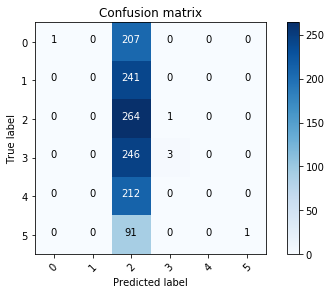

In [67]:
svm_classifier=svm.SVC(gamma=20,C=100)
svm_classifier.fit(tfidf_train, trainy)
svm_pred=svm_classifier.predict(tfidf_test)
svm_pred2=svm_classifier.predict(tfidf_valid)
score = metrics.accuracy_score(testy, svm_pred)
score2=metrics.accuracy_score(validy,svm_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:%0.3f"%score2)
cm = metrics.confusion_matrix(testy, svm_pred, labels=[0, 1,2,3,4,5])
plot_confusion_matrix(cm, classes=[0, 1,2,3,4,5])

# Random Forest Classifier 

Test accuracy:   0.212
Valid accuracy:0.201
Confusion matrix, without normalization


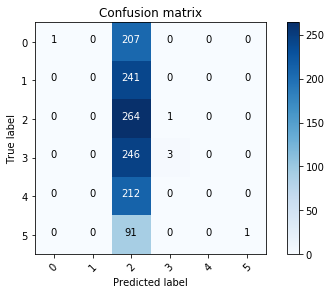

In [68]:
f_clf=RandomForestClassifier(n_estimators=500)
f_clf.fit(tfidf_train,trainy)
pred=f_clf.predict(tfidf_test)
pred2=f_clf.predict(tfidf_valid)
score = metrics.accuracy_score(testy, svm_pred)
score2=metrics.accuracy_score(validy,svm_pred2)
print("Test accuracy:   %0.3f" % score)
print("Valid accuracy:%0.3f"%score2)
cm = metrics.confusion_matrix(testy, svm_pred, labels=[0, 1,2,3,4,5])
plot_confusion_matrix(cm, classes=[0, 1,2,3,4,5])

# Glove Preprocessing for RNN

In [69]:
l=[]
l.extend(trainx)
l.extend(testx)
l.extend(validx)

In [70]:
vocab=set()
for i in l:
    lst=i.split()
    for j in lst:
        vocab.add(j)
vocab_size=len(vocab)
print(vocab_size)

10540


In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(l)

In [72]:
sequences_train = tokenizer.texts_to_sequences(trainx)
sequences_test = tokenizer.texts_to_sequences(testx)
sequences_valid = tokenizer.texts_to_sequences(validx)

In [73]:
maxlen=100

In [74]:
data_train = pad_sequences(sequences_train, maxlen=maxlen)
data_test = pad_sequences(sequences_test, maxlen=maxlen)
data_val = pad_sequences(sequences_valid , maxlen=maxlen)

In [75]:
print(data_train.shape)
print(data_test.shape)
print(data_val.shape)
data_train=data_train/vocab_size
data_test=data_test/vocab_size
data_val=data_val/vocab_size

(10240, 100)
(1267, 100)
(1284, 100)


In [76]:
print(data_train[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00616698 0.01755218 0.11148008 0.13870968 0.54981025 0.00626186
 0.00493359 0.0914611  0.05218216 0.24753321 0.19525617 0.00929791
 0.01698292 0.021537   0.03776091 0.0069

# Neural Network

In [77]:
model = Sequential()
model.add(Embedding(vocab_size, 100,input_length=maxlen,mask_zero=True))
model.add(Bidirectional(LSTM(32,dropout=0.3)))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history_ltsm = model.fit(data_train, y_train, epochs=10, batch_size=128, validation_data=(data_val,y_val), callbacks=callbacks_list)

Train on 10240 samples, validate on 1284 samples
Epoch 1/10
10240/10240 [==============================] - 35s 3ms/step - loss: 1.7614 - acc: 0.2007 - val_loss: 1.7619 - val_acc: 0.2087

Epoch 00001: val_acc improved from -inf to 0.20872, saving model to weights-improvement-01-0.21.hdf5
Epoch 2/10
10240/10240 [==============================] - 31s 3ms/step - loss: 1.7570 - acc: 0.2104 - val_loss: 1.7597 - val_acc: 0.2196

Epoch 00002: val_acc improved from 0.20872 to 0.21963, saving model to weights-improvement-02-0.22.hdf5
Epoch 3/10
10240/10240 [==============================] - 31s 3ms/step - loss: 1.7559 - acc: 0.2136 - val_loss: 1.7627 - val_acc: 0.2227

Epoch 00003: val_acc improved from 0.21963 to 0.22274, saving model to weights-improvement-03-0.22.hdf5
Epoch 4/10
10240/10240 [==============================] - 31s 3ms/step - loss: 1.7557 - acc: 0.2213 - val_loss: 1.7575 - val_acc: 0.2227

Epoch 00004: val_acc did not improve from 0.22274
Epoch 5/10
10240/10240 [================

In [78]:
model.save('model6class.h5')
y_pred=model.predict(data_test)

In [79]:
y_pred=[np.argmax(i) for i in y_pred]

accuracy:   0.230
Confusion matrix, without normalization


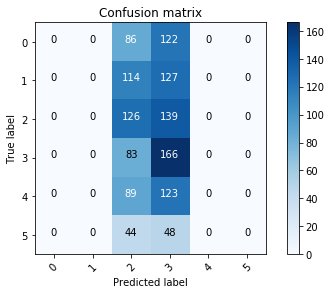

In [80]:
score = metrics.accuracy_score(testy, y_pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(testy, y_pred, labels=[0, 1,2,3,4,5])
plot_confusion_matrix(cm, classes=[0, 1,2,3,4,5])

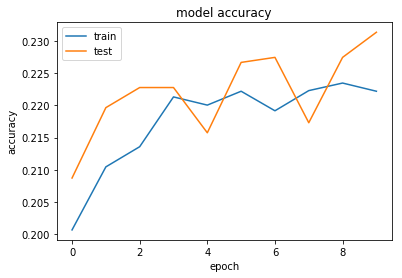

In [81]:
plt.plot(history_ltsm.history['acc'])
plt.plot(history_ltsm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()